## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


boston = pd.read_csv('boston.csv')
boston = boston.drop(columns='b')
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [20]:
colunas_correlacionadas = ['rm', 'nox', 'indus', 'lstat', 'tax', 'ptratio', 'medv']
boston_df = boston[colunas_correlacionadas]
boston_df

,rm,nox,indus,lstat,tax,ptratio,medv
0,6.575,0.538,2.31,4.98,296,15.3,24.0
1,6.421,0.469,7.07,9.14,242,17.8,21.6
2,7.185,0.469,7.07,4.03,242,17.8,34.7
3,6.998,0.458,2.18,2.94,222,18.7,33.4
4,7.147,0.458,2.18,5.33,222,18.7,36.2
...,...,...,...,...,...,...,...
501,6.593,0.573,11.93,9.67,273,21.0,22.4
502,6.120,0.573,11.93,9.08,273,21.0,20.6
503,6.976,0.573,11.93,5.64,273,21.0,23.9
504,6.794,0.573,11.93,6.48,273,21.0,22.0


In [21]:
x = boston_df.drop(columns=['medv'])
x.head()

,rm,nox,indus,lstat,tax,ptratio
0,6.575,0.538,2.31,4.98,296,15.3
1,6.421,0.469,7.07,9.14,242,17.8
2,7.185,0.469,7.07,4.03,242,17.8
3,6.998,0.458,2.18,2.94,222,18.7
4,7.147,0.458,2.18,5.33,222,18.7


In [24]:
y = boston_df['medv']
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2360873)

In [83]:
regr_2 = DecisionTreeRegressor(max_depth=8)
regr_2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8)

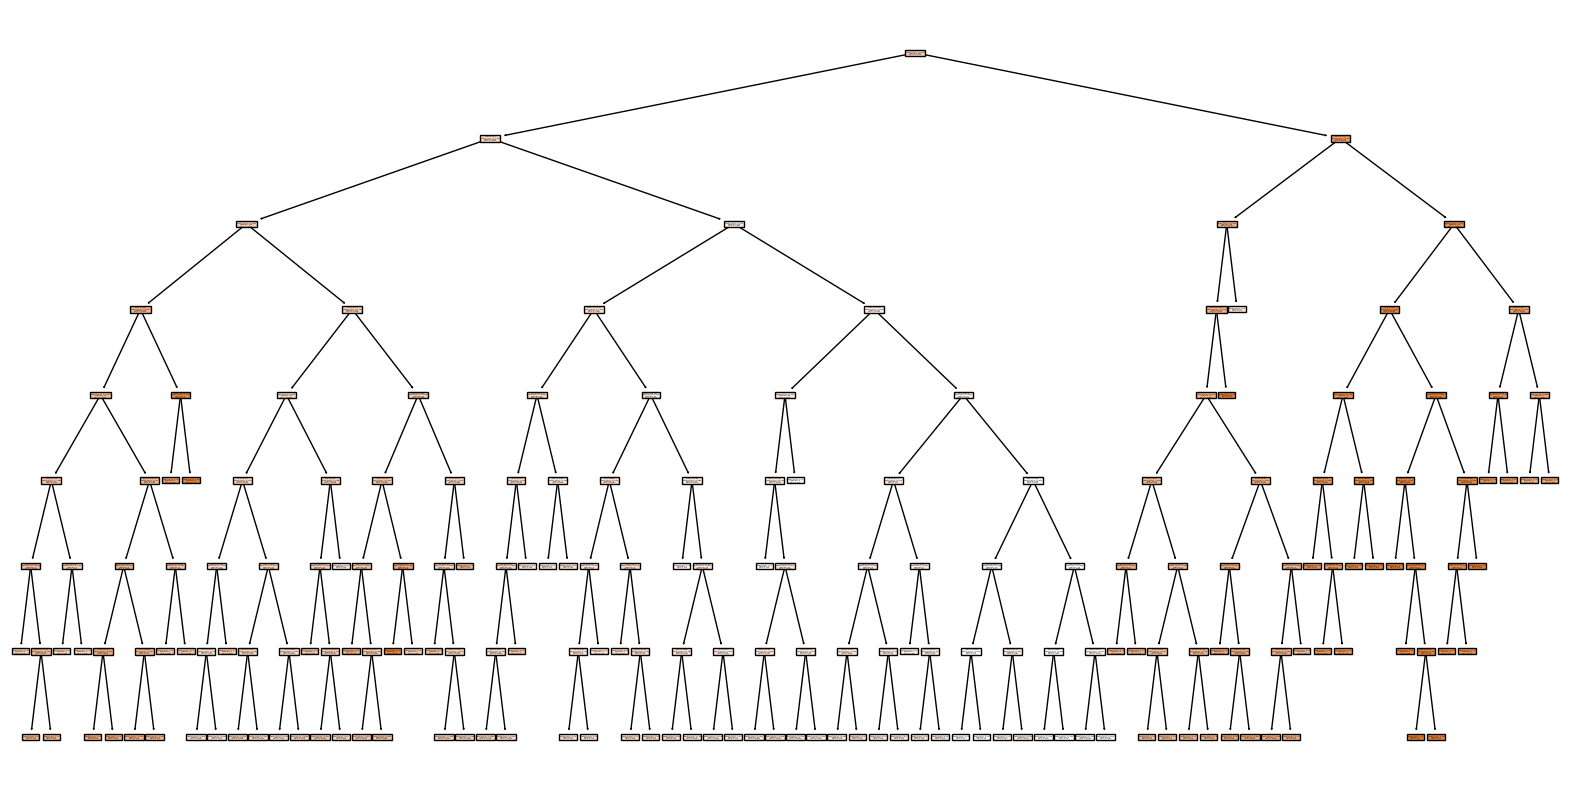

In [84]:
plt.rc('figure', figsize=(20, 10))
tp = tree.plot_tree(regr_2, 
                    feature_names=x.columns.tolist(),  
                    filled=True)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [85]:
path = regr_2.cost_complexity_pruning_path(x_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 5.64971751e-05, 5.64971751e-05, 5.64971751e-05,
        1.27118644e-04, 1.27118644e-04, 2.25988701e-04, 5.08474576e-04,
        5.08474576e-04, 6.77966102e-04, 6.77966102e-04, 6.92090395e-04,
        6.92090395e-04, 9.22787194e-04, 1.41242938e-03, 1.70903955e-03,
        2.27871940e-03, 2.56355932e-03, 2.71186441e-03, 2.86016949e-03,
        2.94256121e-03, 4.35263653e-03, 5.09887006e-03, 5.09887006e-03,
        5.09887006e-03, 5.94296476e-03, 6.22881356e-03, 8.30508475e-03,
        1.15348399e-02, 1.16101695e-02, 1.22760291e-02, 1.27118644e-02,
        1.49320689e-02, 1.53813559e-02, 1.62711864e-02, 1.73022599e-02,
        2.11362994e-02, 2.24109385e-02, 3.01318267e-02, 3.07350013e-02,
        3.44348031e-02, 4.12212918e-02, 4.15869429e-02, 4.32245763e-02,
        4.90739844e-02, 5.03677314e-02, 5.04343220e-02, 5.14695722e-02,
        5.19926119e-02, 5.23600505e-02, 5.42570269e-02, 5.72881356e-02,
        6.25241112e-02, 6.36909272e-02, 6.56427471

Text(0, 0.5, 'Impureza total das folhas')

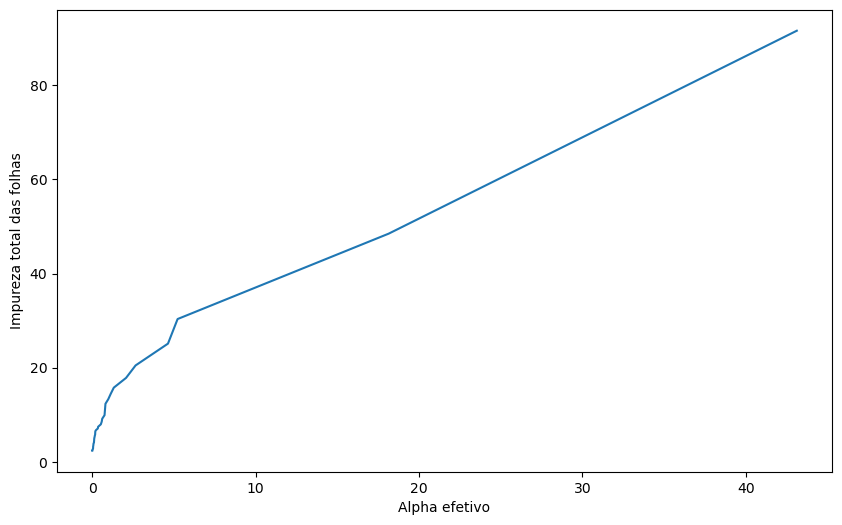

In [86]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [96]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

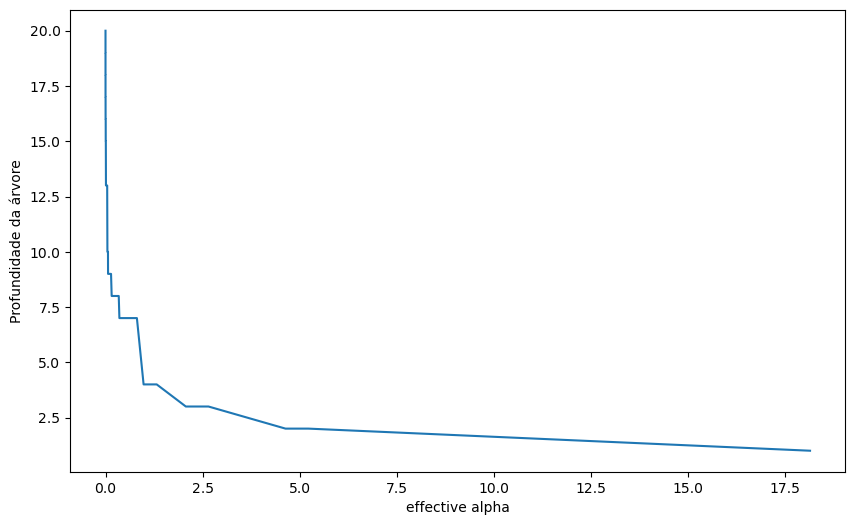

In [88]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [89]:
train_scores = [mean_squared_error(y_train , clf.predict(x_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(x_test )) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

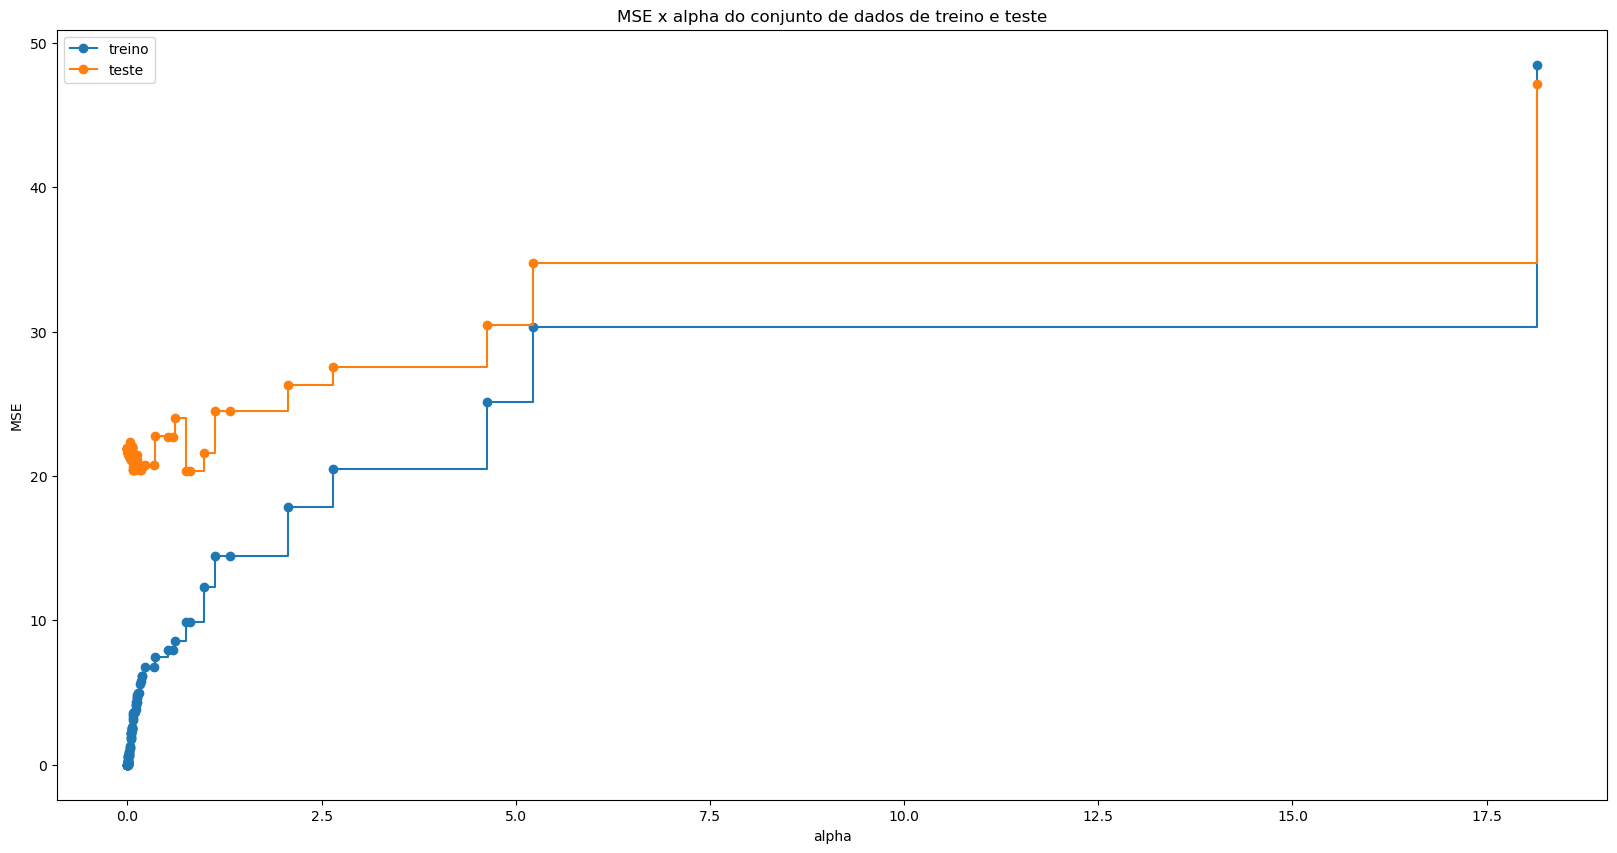

In [90]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [91]:
arvore_final = DecisionTreeRegressor(random_state = 0, ccp_alpha = .25)
arvore_final.fit(x_train, y_train)
print(f'Profundidade: {arvore_final.tree_.max_depth}')
print(f"R-Quadrado na base de testes: {arvore_final.score(x_test, y_test):.2f}")
print(f'MSE na base de testes: {mean_squared_error(y_test, arvore_final.predict(x_test)):.2f}')

Profundidade: 8
R-Quadrado na base de testes: 0.69
MSE na base de testes: 20.79


### 7. Visualize esta árvore.

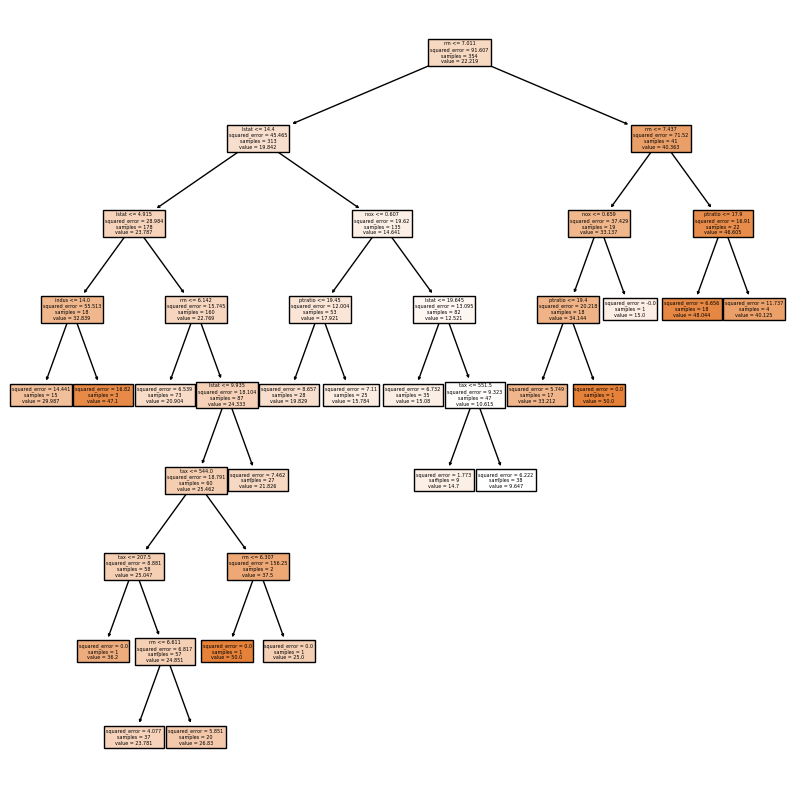

In [95]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(arvore_final, feature_names=x.columns.tolist(), filled=True)